In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
can_df = pd.read_csv("../Dataset/Breast_cancer_data.csv")

In [3]:
can_df.head(100)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0
96,12.180,17.84,77.79,451.1,0.10450,1
97,9.787,19.94,62.11,294.5,0.10240,1
98,11.600,12.84,74.34,412.6,0.08983,1


In [4]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
can_df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [6]:
can_df.groupby('diagnosis').mean()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898
1,12.146524,17.914762,78.075406,462.790196,0.092478


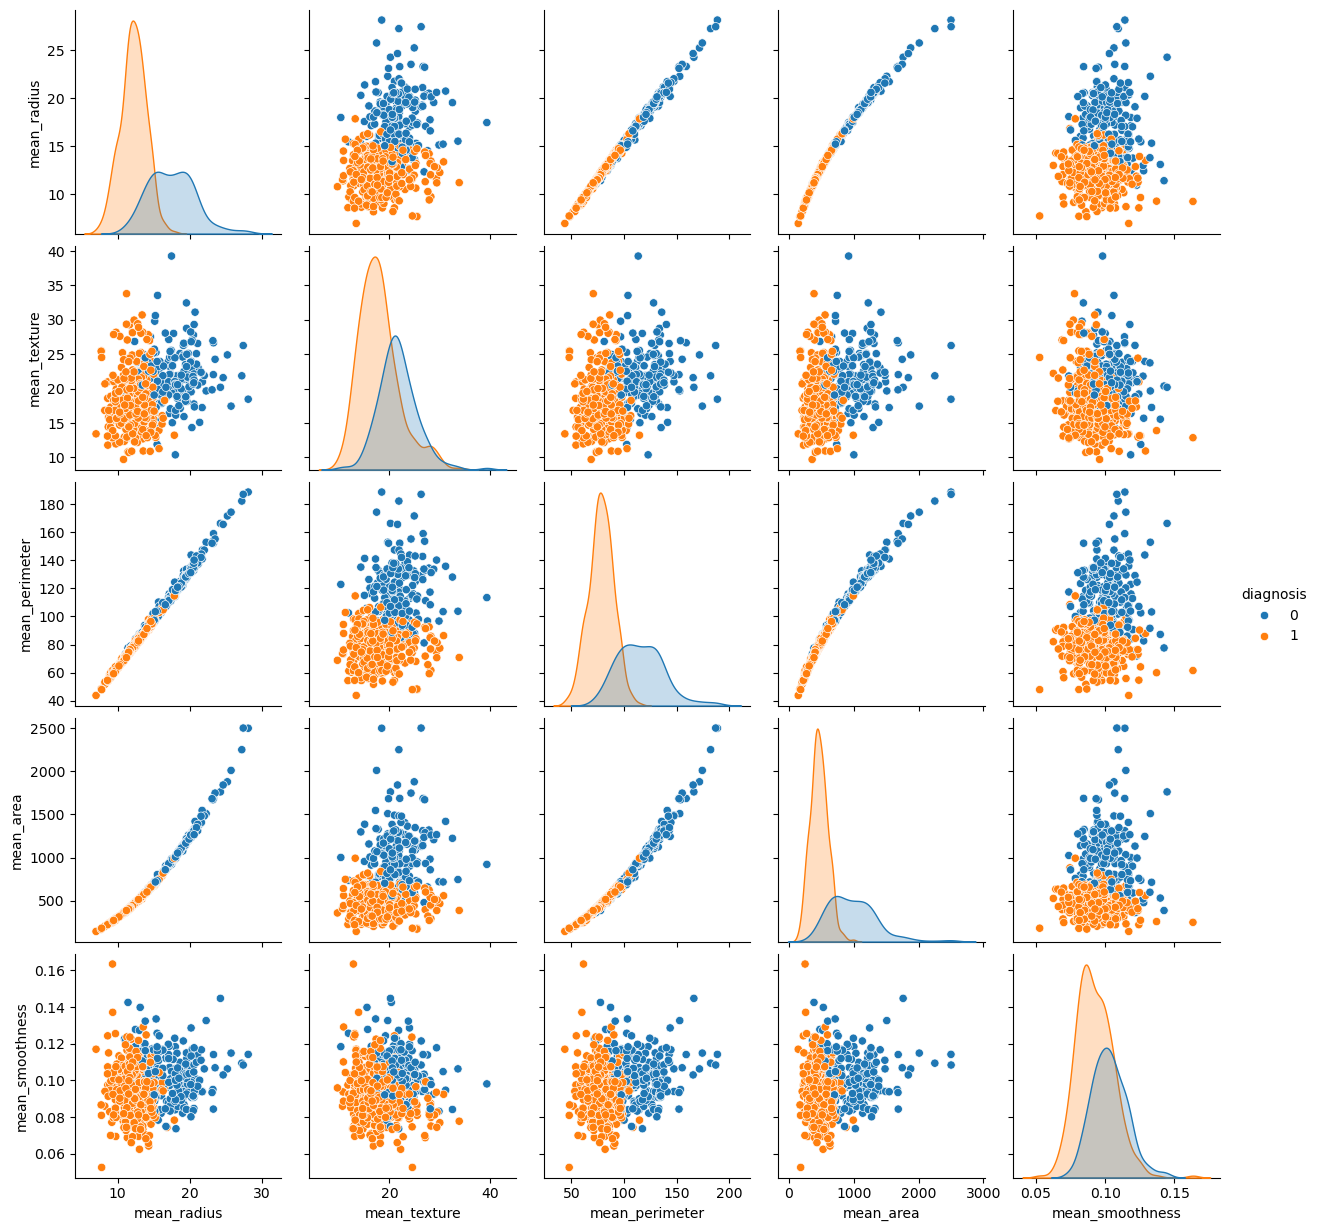

In [7]:
sns.pairplot(can_df, hue="diagnosis")

In [8]:

X = can_df.drop(columns = 'diagnosis' , axis=1)
Y = can_df['diagnosis']


In [9]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


In [10]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [54]:
X.shape

(569, 5)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , stratify=Y, random_state=2)

In [58]:
Y_train.count()

455

In [87]:
X_train.value_counts()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
6.981        13.43         43.79           143.5      0.11700            1
14.470       24.99         95.81           656.4      0.08837            1
15.000       15.51         97.45           684.5      0.08371            1
14.990       25.20         95.54           698.8      0.09387            1
             22.11         97.53           693.7      0.08515            1
                                                                        ..
12.180       17.84         77.79           451.1      0.10450            1
             14.08         77.25           461.4      0.07734            1
12.160       18.03         78.29           455.3      0.09087            1
12.100       17.72         78.07           446.2      0.10290            1
28.110       18.47         188.50          2499.0     0.11420            1
Name: count, Length: 455, dtype: int64

In [62]:
print(X.shape, X_train.shape,X_test.shape)

(569, 5) (455, 5) (114, 5)


In [64]:
classifier = svm.SVC(kernel='linear')

In [66]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [67]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [70]:
training_data_accuracy

0.9120879120879121

In [72]:
input_data = [17.99, 10.38, 122.80, 1001.0, 0.11840]

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
print(input_data_as_numpy_array)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a cancer')
else:
  print('The Person has cancer')

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]]
[0]
The Person does not have a cancer


C:\Users\Romit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [74]:
for column in X.columns:
  print(column)

mean_radius
mean_texture
mean_perimeter
mean_area
mean_smoothness


In [76]:
import pickle

In [78]:
fileName = "../saveModels/Cancer.sav"

In [80]:
pickle.dump(classifier, open(fileName, 'wb'))

In [82]:
loaded_model = pickle.load(open(fileName, 'rb'))

In [84]:
input_data = [12.180, 17.84, 77.79, 451.0, 0.10450]

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)


# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a cancer')
else:
  print('The Person has cancer')

[1]
The Person has cancer


C:\Users\Romit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
